# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le chiffre d'affaire d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le chiffre d'affaire (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le chiffre d'affaires (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];
y=y.reshape(y.shape[0],1)

Text(0, 0.5, "Chiffre d'affaires x1000")

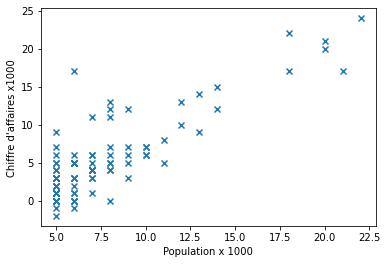

In [4]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [5]:

def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    # garder aussi le cout à chaque itération pour afficher le coût en fonction de theta0 et theta1
    m=len(y)
    result = 1/(2*m) * np.sum((np.matmul(X,theta)-y)**2)
    return result


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [6]:
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        theta=theta-alpha*1/len(y)*X.T.dot(np.matmul(X,theta)-y)
        theta0[i]=theta[0]
        theta1[i]=theta[1]
        costs[i]=computeCost(X,y,theta)
    return theta


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [7]:
theta = np.ones((2, 1))

Calculer le cout initial

In [8]:
initialCost=computeCost(X, y, theta)
initialCost



10.051546391752577

Appel des la fonction de calcul du gradient

In [9]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
costs = np.zeros(iterations)
theta0 = np.zeros(iterations)
theta1 = np.zeros(iterations)
theta = gradientDescent(X, y, theta, alpha, iterations)
theta


array([[-3.55211018],
       [ 1.16609151]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

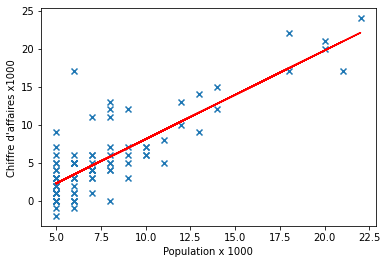

In [10]:
y_pred=X.dot(theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred,c='r')
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

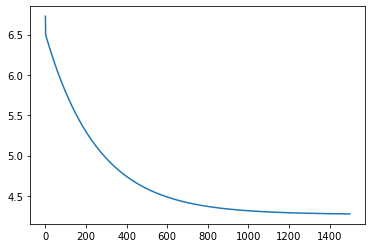

In [11]:

plt.plot(range(iterations),costs)

Prédire des valeurs de x

In [12]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 35000],theta);
predict1

array([40809.65070047])

In [13]:
predict2 = np.matmul([1, 70000],theta);
predict2

array([81622.85351111])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [14]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape


(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [15]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
Xmult=dataMulti[:,0:2]
ymult = dataMulti[:, 2];
ymult=ymult.reshape(ymult.shape[0],1)


Text(0, 0.5, 'Prix')

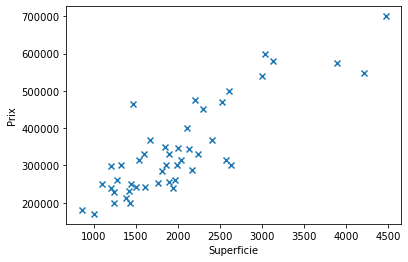

In [16]:
plt.scatter(Xmult[:,0],ymult,marker ='x')
plt.xlabel('Superficie')
plt.ylabel('Prix')

# Theta


In [36]:
thetaMul=np.ones((3,1))
thetaMul

array([[1.],
       [1.],
       [1.]])

In [37]:
# redéfinissez vos fonctions de coût si cela est necessaire
# no need
#computeCost(Xmult,ymult,thetaMul)
    

Mise à l'échelle des données

In [38]:
sc= StandardScaler()
sc.fit(Xmult)
sc.fit(ymult)

StandardScaler()

Normalisation des données en moyenne = 0

Text(0, 0.5, 'Prix')

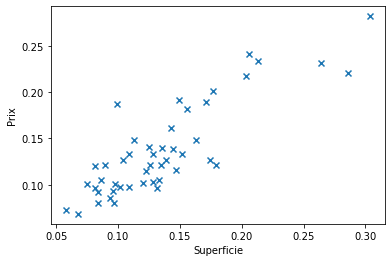

In [39]:
XmultNorm=normalize(Xmult,axis=0)
ymultNorm=normalize(ymult,axis=0)
XmultNorm=np.column_stack((intercept,XmultNorm))
plt.scatter(XmultNorm[:,1],ymultNorm,marker ='x')
plt.xlabel('Superficie')
plt.ylabel('Prix')

Appliquer la descente du gradient à plusieurs variables

array([[-0.09429717],
       [ 0.83633539],
       [ 0.8285411 ]])

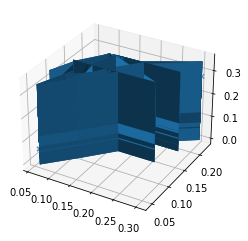

In [40]:
iterations=1500
costs = np.zeros(iterations)
theta0 = np.zeros(iterations)
theta1 = np.zeros(iterations)
thetaMul = gradientDescent(XmultNorm, ymultNorm, thetaMul, alpha, iterations)
y_pred=XmultNorm.dot(thetaMul)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XmultNorm[:,1],XmultNorm[:,2],ymultNorm,marker ='x')
ax.plot_surface(XmultNorm[:,1],XmultNorm[:,2],y_pred)
thetaMul


Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

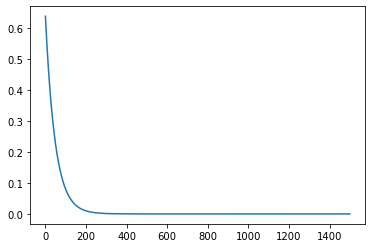

In [41]:
plt.plot(range(iterations),costs)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [42]:
# bonne chance